In [1]:
# Imports & Settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from current directory
env_path = Path('.env')
load_dotenv(env_path)

True

In [2]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

# print(f"Data file path: {path}")

In [3]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

,Date,Profit_pct_100
0,2025-01-01,0.00
1,2025-01-02,0.01
2,2025-01-03,0.03
3,2025-01-05,0.00
4,2025-01-06,-0.04


In [4]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            283 non-null    object 
 1   Profit_pct_100  283 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [5]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'Profit (%)'}, inplace=True)

# columns order
cols = ['Date', 'Profit (%)']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,Profit (%)
Date,
2025-01-01,0.00
2025-01-02,0.01
2025-01-03,0.03
2025-01-05,0.00
2025-01-06,-0.04


In [6]:
# daily_returns are a series as the Profit (%) column
daily_returns = df['Profit (%)']

daily_returns.head()

Date
2025-01-01    0.00
2025-01-02    0.01
2025-01-03    0.03
2025-01-05    0.00
2025-01-06   -0.04
Name: Profit (%), dtype: float64

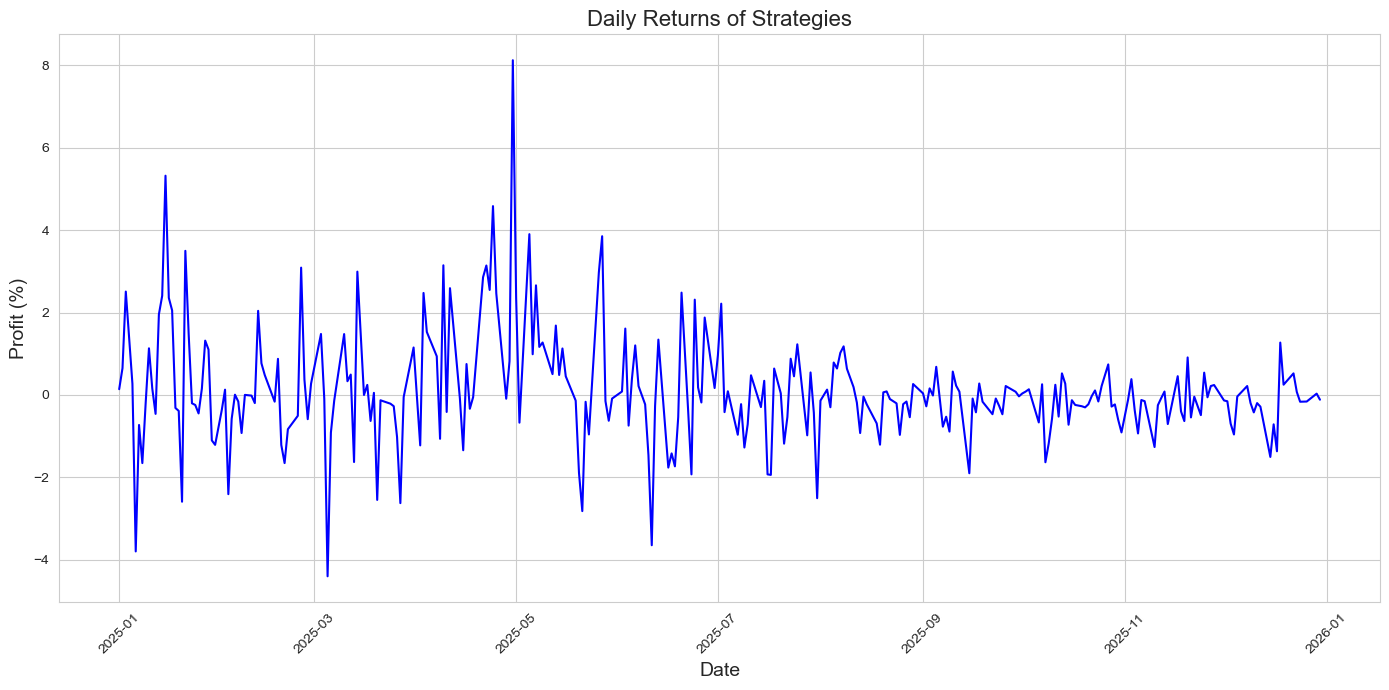

In [7]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Montecarlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations

forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

initial_investment = 100000  # Initial investment amount

# Initilize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future path
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(simulations)

[[103145.82 104297.19 104072.09 ... 117091.48 117070.41 115179.74]
 [102349.12 102384.64 101656.46 ... 153497.61 153196.12 153376.66]
 [101127.37 101040.55 100811.57 ... 132826.08 132775.19 132550.09]
 ...
 [ 99076.07  99062.88  98837.78 ... 132158.79 132375.78 131194.14]
 [ 99085.8   98860.7   98392.46 ... 141256.   142006.04 137606.17]
 [100640.08  98135.18  98817.67 ...  89031.67  89018.48  88755.87]]


In [9]:
type(simulations)

numpy.ndarray

In [10]:
simulations.shape

(1000, 365)

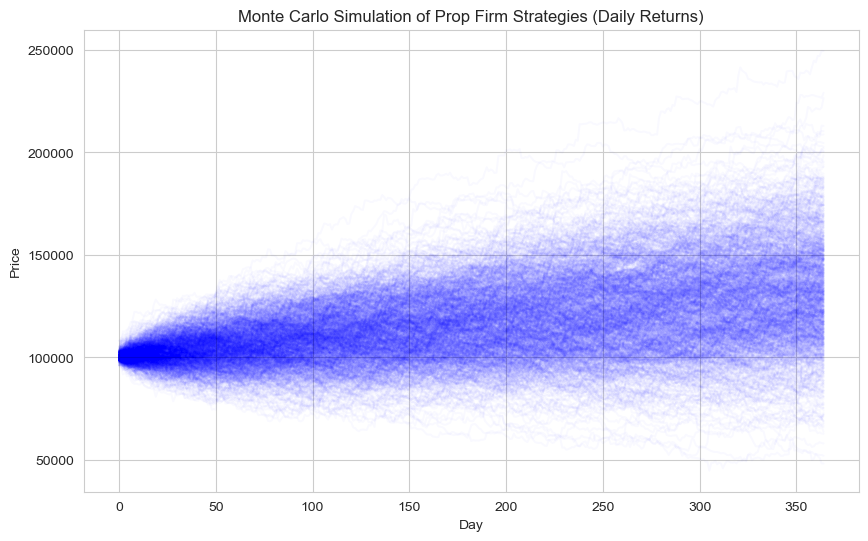

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Prop Firm Strategies (Daily Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [12]:
# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.0008686314487632595
Volatility: 0.01359008465012725


In [13]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[153633.05869544 106051.94764553 147706.03794371 127549.49902757
 137969.71165862  78444.02383123 145382.65755317  94455.61693546
 193791.71401831 158149.11762519 182004.29739206 293885.71044199
 107532.19416084 168194.47509915 135244.47793113  94342.41204076
  91585.63852292 177848.89048662 135322.69275388 132741.75399322
 131716.41232054 155313.41675661 145421.03680926 115372.29314493
 123940.62809468 142590.47252155 110446.02428525 133025.86664296
 131895.31972165 166989.2959058  187850.93293834 214556.7764417
 163912.04273351 128880.11604235  96743.7205807  227767.19897008
 167111.95533457 165409.85122826 124371.0811316  109854.63377254
 121835.55590814 163732.47421048 148719.58477062 158997.57882914
 201283.16575763 140825.37238903  87951.27583697 165594.99419939
 139906.57583551 106262.9471767   99167.21109509 109110.13010023
  91465.99090412 100147.78400095  99683.01639275 102803.73462337
 146539.16440778 186110.88711391 102742.46914455 118978.0139913
 157771.37034893 102599.045

In [14]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $15,572.06
Expected Tail Loss (Conditional VaR): $24,583.34


In [15]:
desired_return = 0.10  # Desired return

num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 76.00%


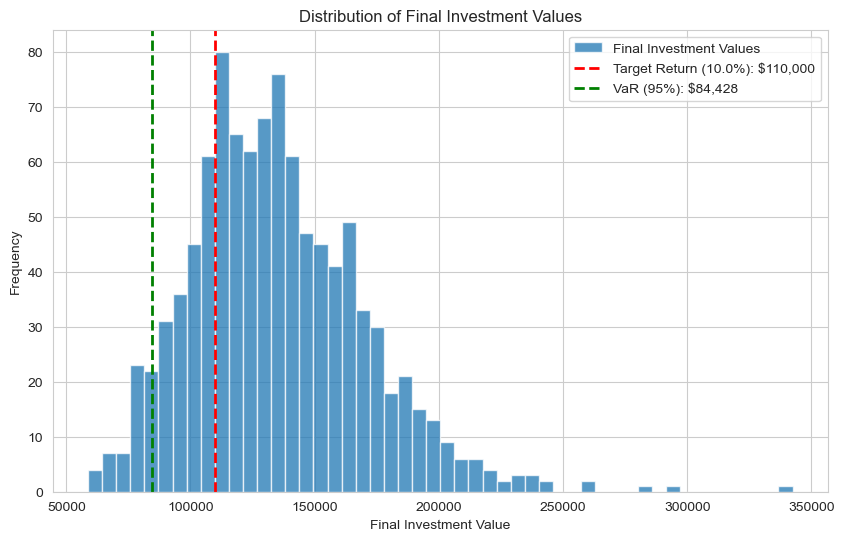

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75, label='Final Investment Values')
plt.axvline(
    initial_investment * (1 + desired_return),
    color="r",
    linestyle="dashed",
    linewidth=2,
    label=f'Target Return ({desired_return*100}%): ${initial_investment * (1 + desired_return):,.0f}'
)
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2, 
           label=f'VaR (95%): ${initial_investment - var:,.0f}')
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()